In [ ]:
!pip install -r requirements.txt

In [1]:
# -----------------------------------------------------------
# Dissertation Project: An Empirical Study on the Classification 
# Performance of Deep Learning vs. Gradient Boosting 
# on heterogeneous tabular data
#
# This module provides functions for running and analyzing results from the,
# FFNN model. It includes methods for model training, 
# performance evaluation, and interpretation of results.
#
# Author: Adam Mabrouk
# Supervisor: Ben Ralph
# Institution: University of Bath
# Created on: 01/01/2024
# Version: 1.0
# -----------------------------------------------------------
# Library Versions Used
# ----------------------
# Python version: 3.11.5 
# tensorflow version: 2.15.0

# Standard library imports for model training time and warnings.
from time import time
import numpy as np
import warnings

# Specific python file imports to run the model
from feed_forward_network_model import create_feed_forward_neural_network, optuna_ffnn_params
from Results import ModelResults
from model_training import ModelTraining
from data_loader import load_data

# Miscellaneous settings
warnings.filterwarnings('ignore')

2024-02-04 20:38:21.229609: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
random_seed = np.random.randint(1,1000)
random_seed

179

- **Operating this notebook**

    - `Select dataset (Currently set to 5k)`
    - `Copy and past parameters from manual or optuna below`
    - `Select optuna to True to run or False to use manual (Currently set to True)`
    - `Uncomment to record results below (Currently set to not save results) If saved they are saved directly in the model_results_for_further_testing folder`

In [3]:
root_path = "."
data_source = "datasets"

"""Select dataset"""

data = 'lending_club_dataset'
# data = 'heloc_dataset'
# data = 'adult_income_dataset'
folder_name = data
subset_size = 5000 

X_train, y_train, X_val, y_val, X_test, y_test = load_data(root_path, data_source, folder_name, subset_size)

In [4]:
# Optuna lending club
# Best Trial ID: 13
# Best Trial Value (Performance Metric): 0.8953860998153687
# Optimal Hyperparameters:
#   dropout_rate: 0.47211236067143053
#   units_1: 45
#   dropout_1: 0.38985489073798096
#   units_2: 191
#   dropout_2: 0.40650645502549665
#   seed: 27
#   learning_rate: 0.0004927099591561717
#   batch_size: 180
#   lr_reduce_factor: 0.49493116254103986
#   lr_reduce_patience: 9
#   lr_reduce_threshold: 0.0007490202631542447

# Optuna Heloc
# Best Trial ID: 7
# Best Trial Value (Performance Metric): 0.7542962431907654
# Optimal Hyperparameters:
#   dropout_rate: 0.10994400344232035
#   units_1: 202
#   dropout_1: 0.4559895563963536
#   units_2: 85
#   dropout_2: 0.37631434492988375
#   seed: 670
#   learning_rate: 0.0015816636352466217
#   batch_size: 86
#   lr_reduce_factor: 0.278237556575474
#   lr_reduce_patience: 10
#   lr_reduce_threshold: 0.0005356372816457361

# Optuna adult Income
# Best Trial ID: 11
# Best Trial Value (Performance Metric): 0.7051752209663391
# Optimal Hyperparameters:
#   dropout_rate: 0.1970646820707202
#   units_1: 60
#   dropout_1: 0.35390130872306935
#   units_2: 506
#   dropout_2: 0.14672988120421895
#   seed: 668
#   learning_rate: 0.009598920090177921
#   batch_size: 93
#   lr_reduce_factor: 0.4981705617826457
#   lr_reduce_patience: 10
#   lr_reduce_threshold: 0.0009948052096390042

In [5]:
"""Manual parameter tuning

The parameters below were only applied to lending club. The optuna parameters above were applied to the datasets. 
Subsequently this model was not used for the next experiment due to poor/limited performance, only preliminary data and testing"""

# Lending club, 
# Using predefined best parameters:
  # units_1: 32
  # dropout_1: 0.3
  # units_2: 64
  # dropout_2: 0.3
  # seed: 660
  # learning_rate: 0.001
  # batch_size: 32
  # lr_reduce_factor: 0.2
  # lr_reduce_patience: 7
  # lr_reduce_threshold: 0.0005

'Manual parameter tuning\n\nThe parameters below were only applied to lending club. The optuna parameters above were applied to the datasets. \nSubsequently this model was not used for the next experiment due to poor/limited performance, only preliminary data and testing'

In [7]:
use_optuna = True # True or False
checkpoint_name = "feed_forward_neural_network"
log_dir = f"logs/ffnn/{time()}"
create_model_function = create_feed_forward_neural_network

seed = random_seed
epochs = 30 
verbose = 1
n_trials = 20

best_params = {

    "units_1": 32,
    "dropout_1": 0.3,
    "units_2": 64,
    "dropout_2": 0.3,
    "seed": seed,
    "learning_rate": 0.001,
    "batch_size": 32,
    "lr_reduce_factor": 0.2,
    "lr_reduce_patience": 7,
    "lr_reduce_threshold": 0.0005

}
    
params = optuna_ffnn_params if use_optuna else best_params

model_training = ModelTraining(seed,
                               use_optuna, checkpoint_name, 
                               log_dir, create_model_function,
                               epochs, verbose, n_trials, params)

model, history, final_training_time = model_training.train_and_evaluate(X_train, y_train, X_val, y_val)


Best params: {'units_1': 32, 'dropout_1': 0.3, 'units_2': 64, 'dropout_2': 0.3, 'seed': 179, 'learning_rate': 0.001, 'batch_size': 32, 'lr_reduce_factor': 0.2, 'lr_reduce_patience': 7, 'lr_reduce_threshold': 0.0005}
Epoch 1/30
125/125 [==============================] - 1s 4ms/step - loss: 0.6610 - accuracy: 0.6010 - auprc: 0.6440 - val_loss: 0.6053 - val_accuracy: 0.7280 - val_auprc: 0.5261 - lr: 0.0010
Epoch 2/30
125/125 [==============================] - 0s 2ms/step - loss: 0.6336 - accuracy: 0.6550 - auprc: 0.6970 - val_loss: 0.5720 - val_accuracy: 0.7680 - val_auprc: 0.5131 - lr: 0.0010
Epoch 3/30
125/125 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.6825 - auprc: 0.7174 - val_loss: 0.5683 - val_accuracy: 0.7640 - val_auprc: 0.5135 - lr: 0.0010
Epoch 4/30
125/125 [==============================] - 0s 2ms/step - loss: 0.6129 - accuracy: 0.6770 - auprc: 0.7180 - val_loss: 0.5878 - val_accuracy: 0.7540 - val_auprc: 0.5126 - lr: 0.0010
Epoch 5/30
125/125 [

In [8]:
def display_optimal_hyperparameters(study, use_optuna, best_params=None):
    if use_optuna and study is not None:
        print("Best Trial ID:", study.best_trial.number)
        print("Best Trial Value (Performance Metric):", study.best_trial.value)
        print("Optimal Hyperparameters:")
        for key, value in study.best_trial.params.items():
            print(f"  {key}: {value}")
    elif not use_optuna and best_params is not None:
        print("Using predefined best parameters:")
        for key, value in best_params.items():
            print(f"  {key}: {value}")
    else:
        print("No hyperparameters available to display.")

display_optimal_hyperparameters(model_training.study, use_optuna, best_params)

Using predefined best parameters:
  units_1: 32
  dropout_1: 0.3
  units_2: 64
  dropout_2: 0.3
  seed: 179
  learning_rate: 0.001
  batch_size: 32
  lr_reduce_factor: 0.2
  lr_reduce_patience: 7
  lr_reduce_threshold: 0.0005


In [10]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}
%reload_ext tensorboard

In [11]:
from Results import ModelResults

16/16 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       382
           1       0.45      0.53      0.49       118

    accuracy                           0.74       500
   macro avg       0.65      0.66      0.66       500
weighted avg       0.75      0.74      0.74       500



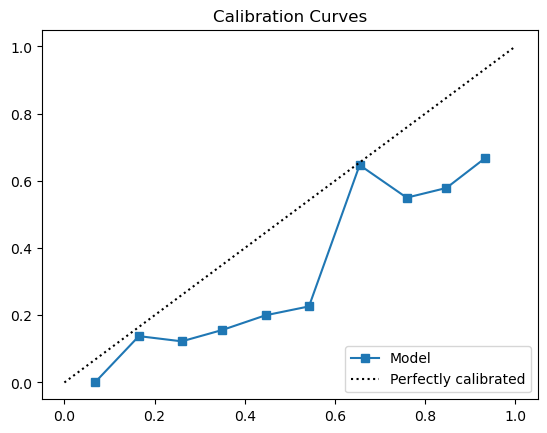

In [12]:
best_model = model

# results = ModelResults(best_model, X_test, y_test, X_train, "ffnn", folder_name.replace("_dataset",""), history, model_training.study)
results = ModelResults(model, X_test, y_test, X_train, None, None, history)

In [ ]:
results.calibration_curve()

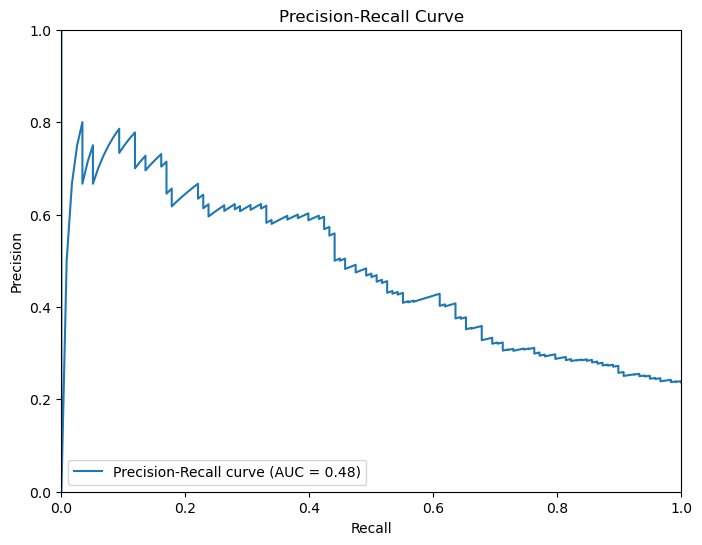

In [13]:
results.auprc()

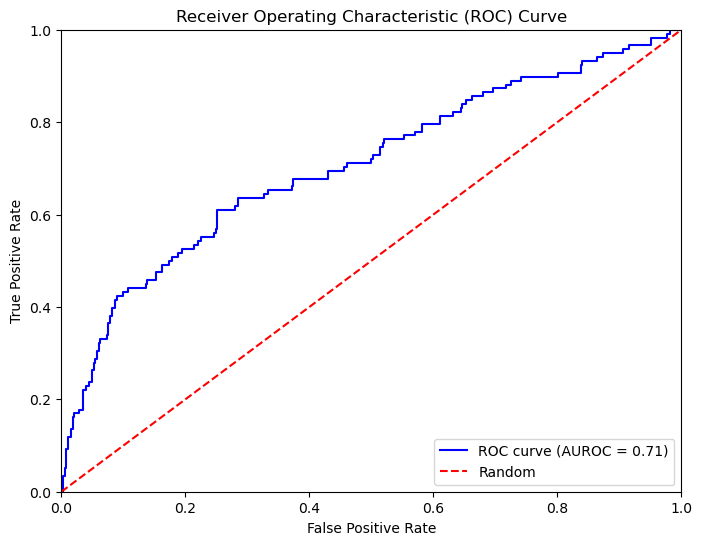

In [14]:
results.auroc()


In [15]:
results.display_metrics()


         Metric Value Percentage
4   Sensitivity  0.53      53.0%
5   Specificity  0.80      80.0%
6      Accuracy  0.74      74.0%
7     Precision  0.45      45.0%
8        Recall  0.53      53.0%
9      F1-score  0.49      49.0%
10       G-Mean  0.65      65.0%


True Negatives:  307
False Positives:  75
False Negatives:  56
True Positives:  62


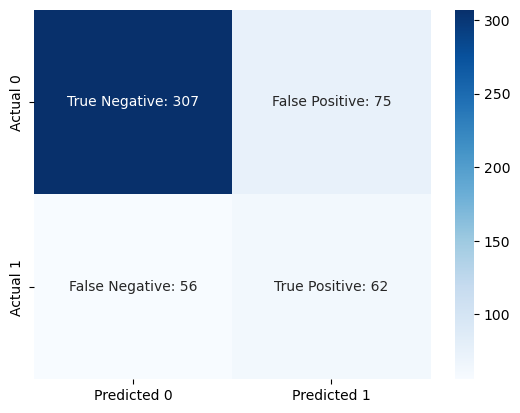

In [16]:
results.confusion_matrix()


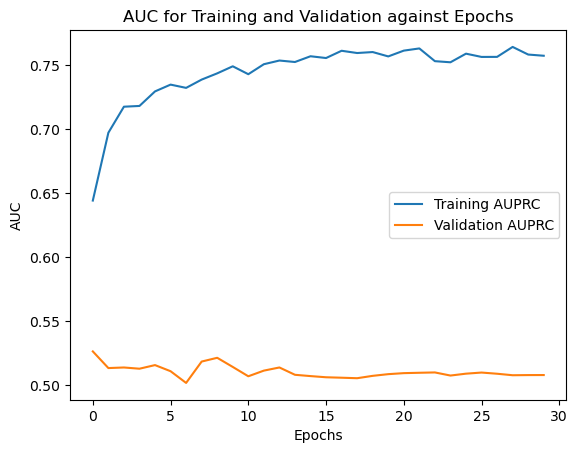

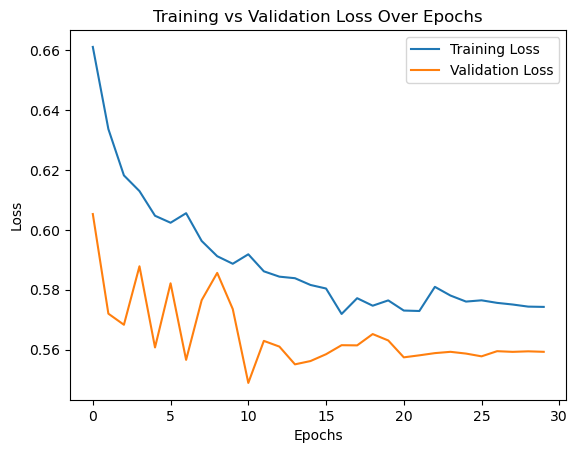

In [17]:
results.model_history()


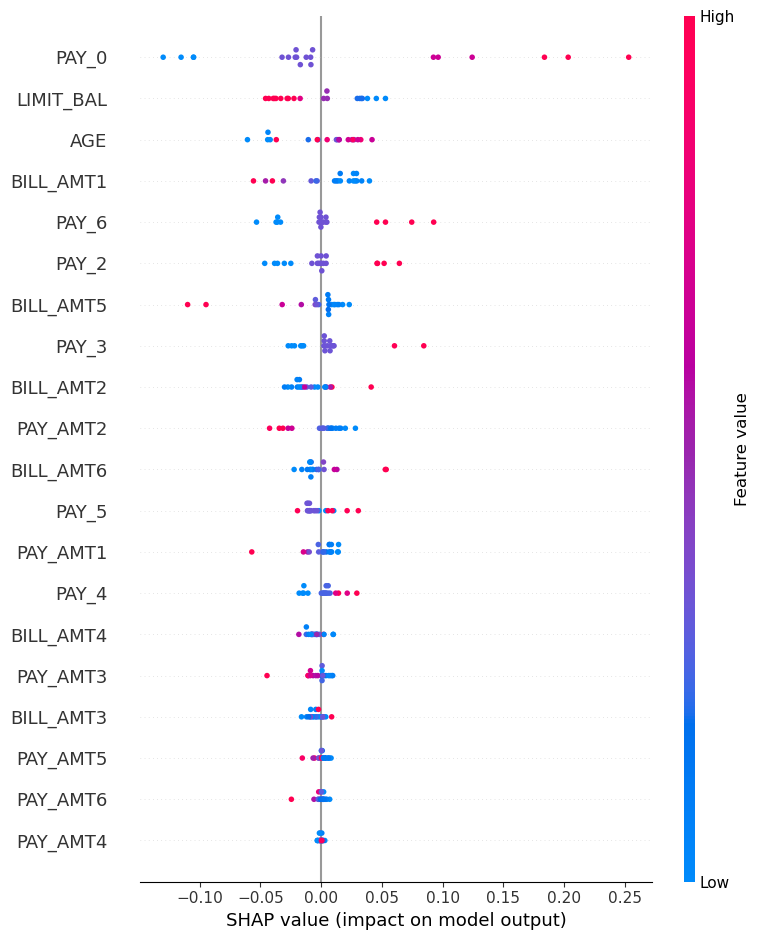

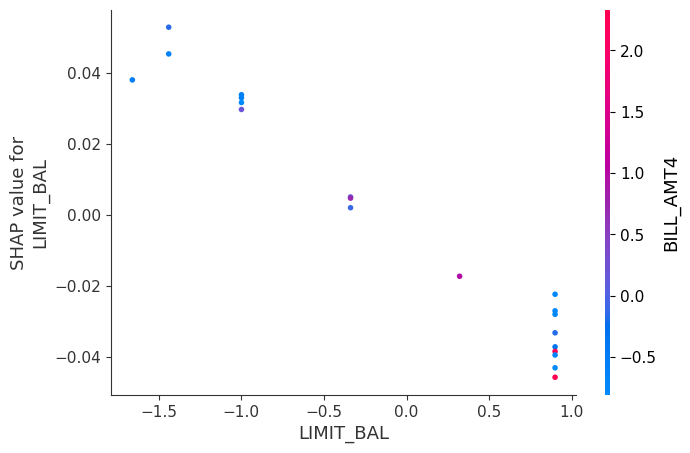

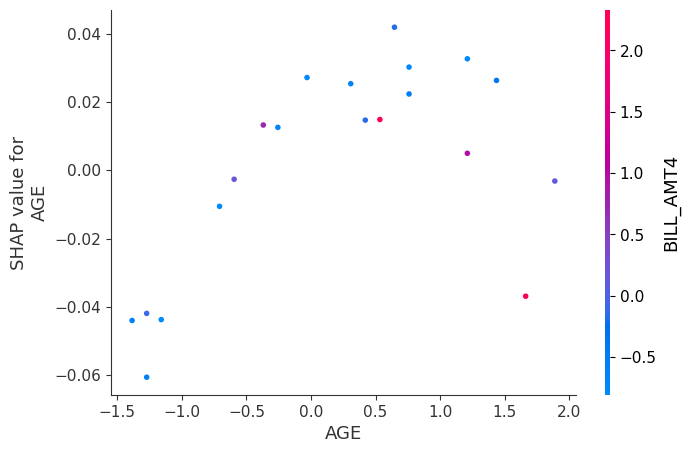

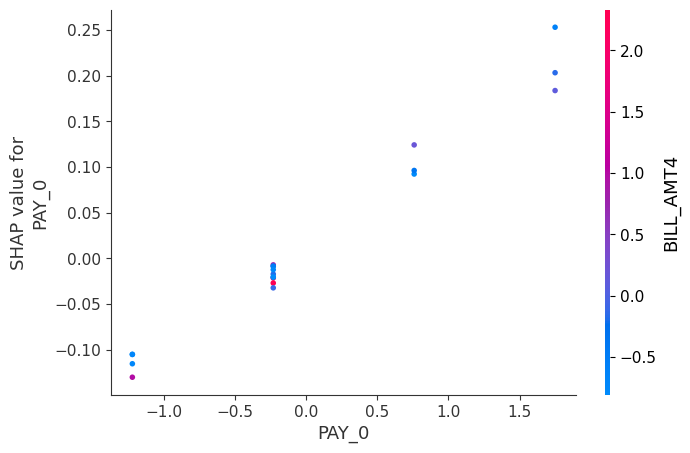

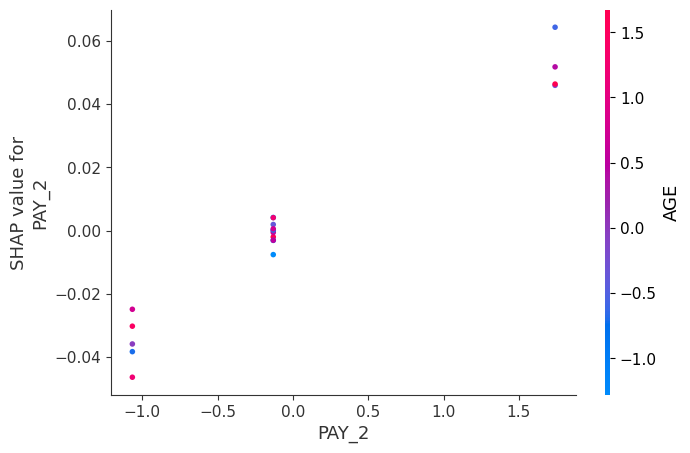

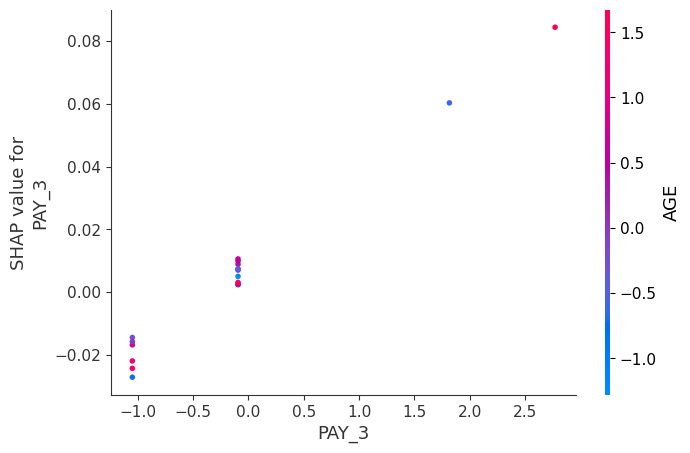

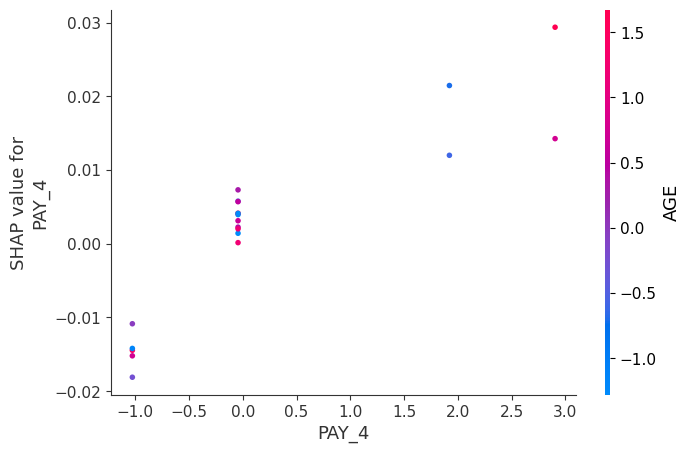

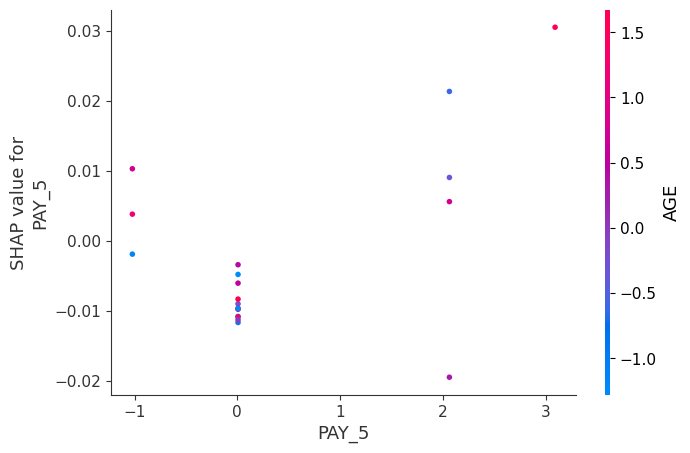

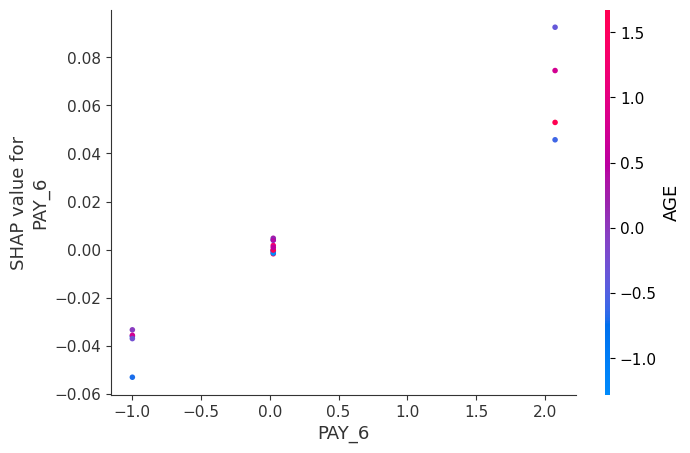

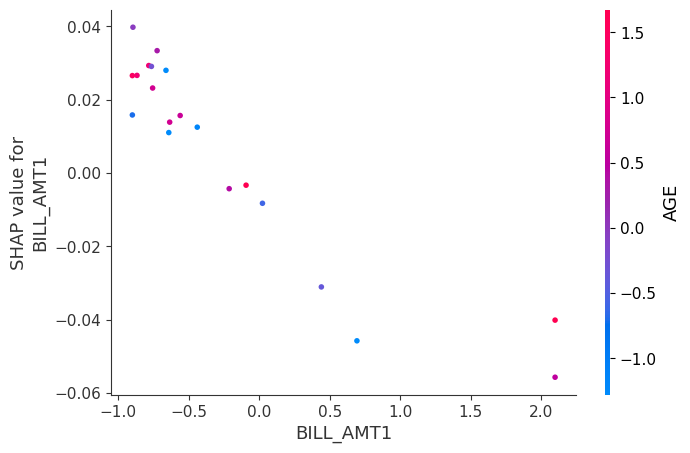

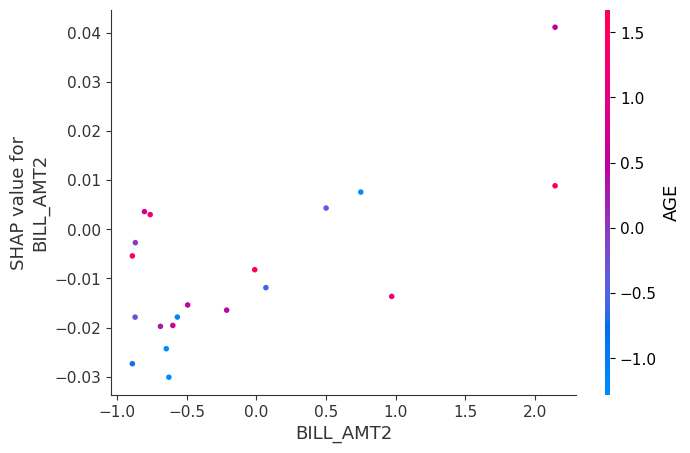

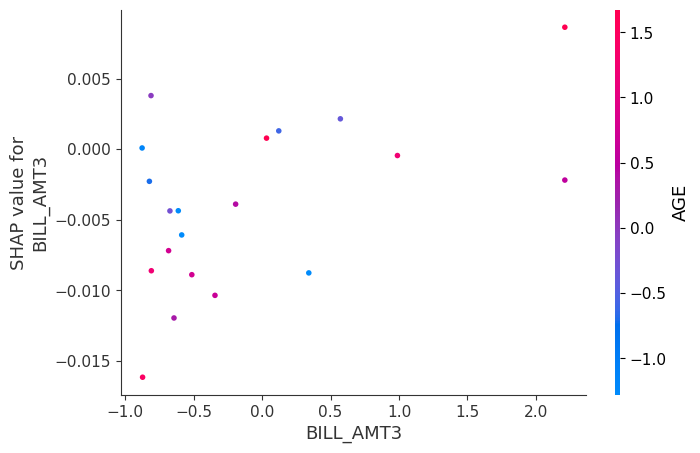

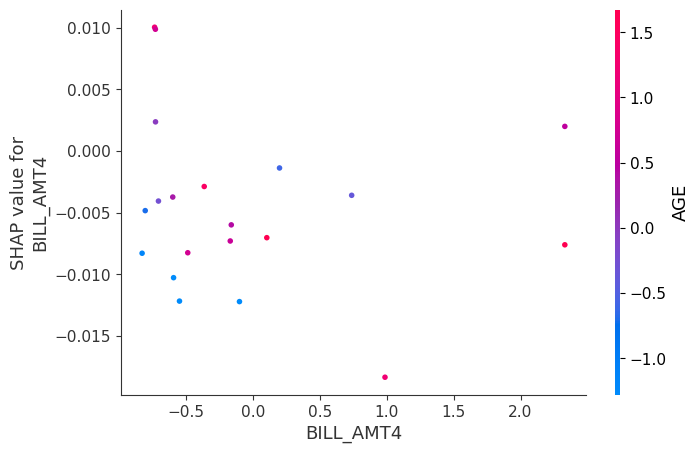

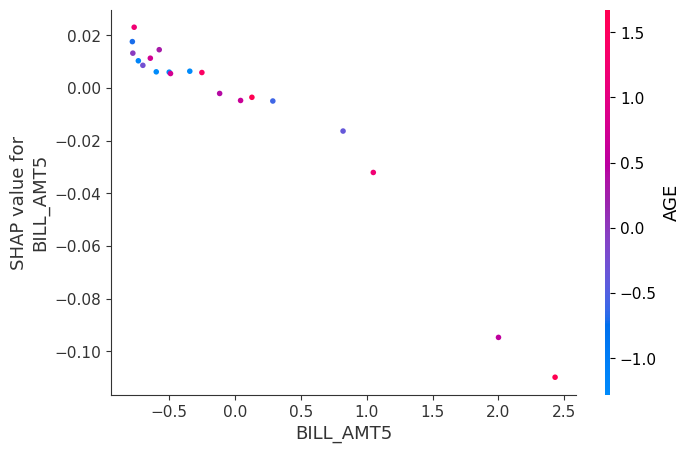

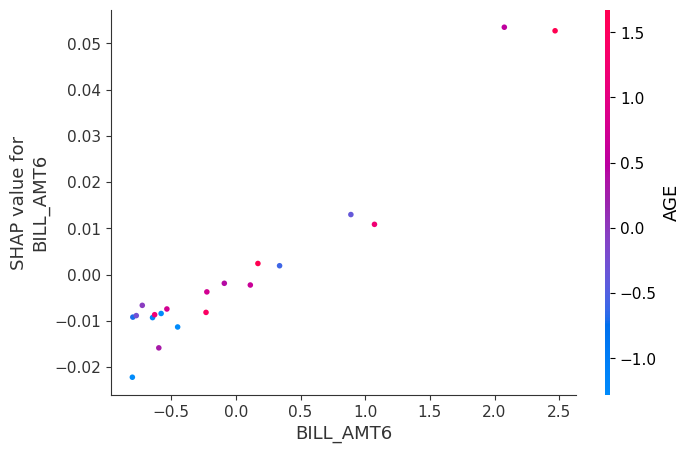

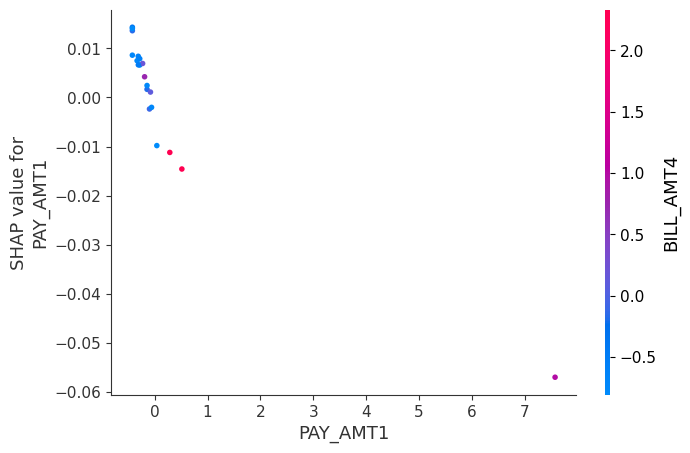

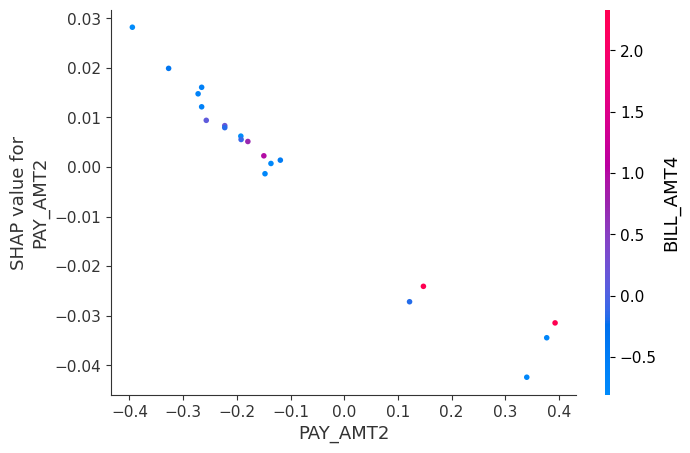

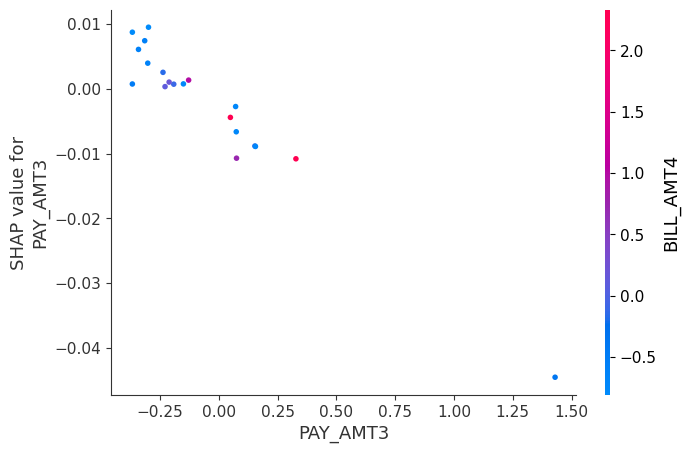

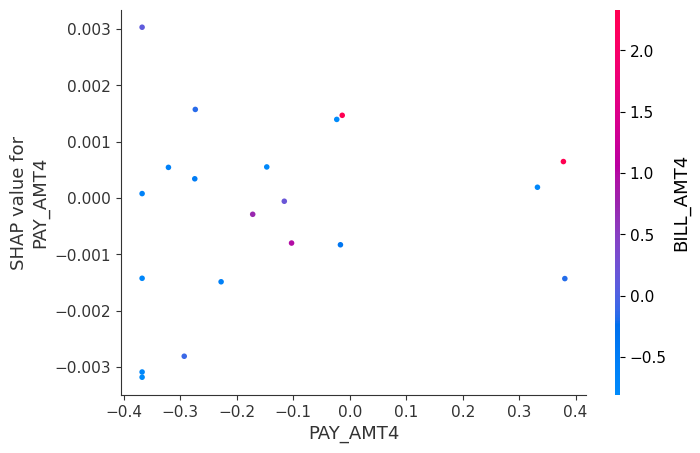

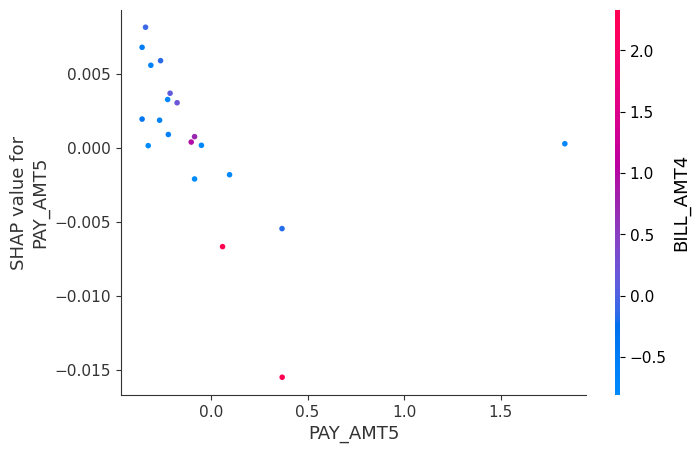

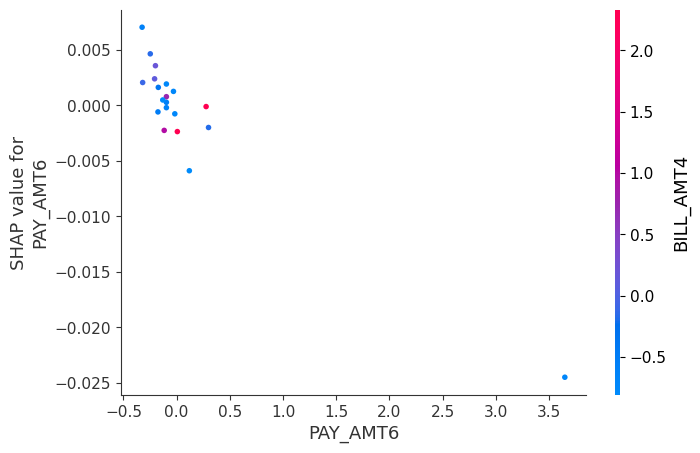

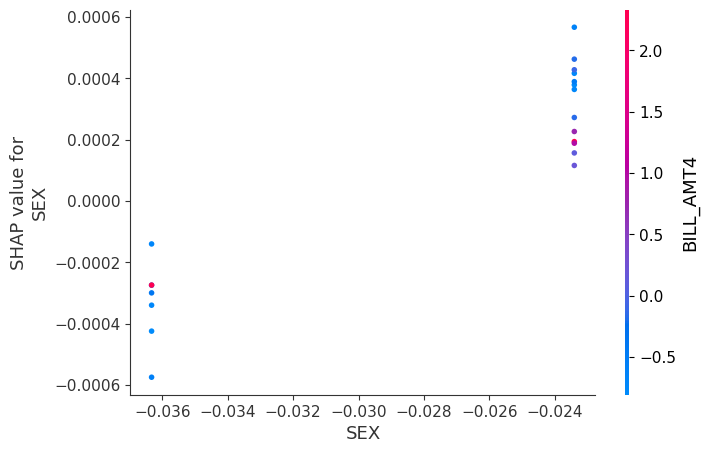

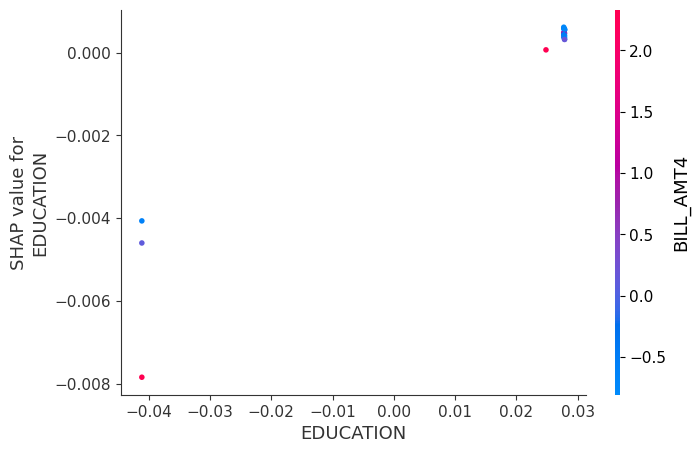

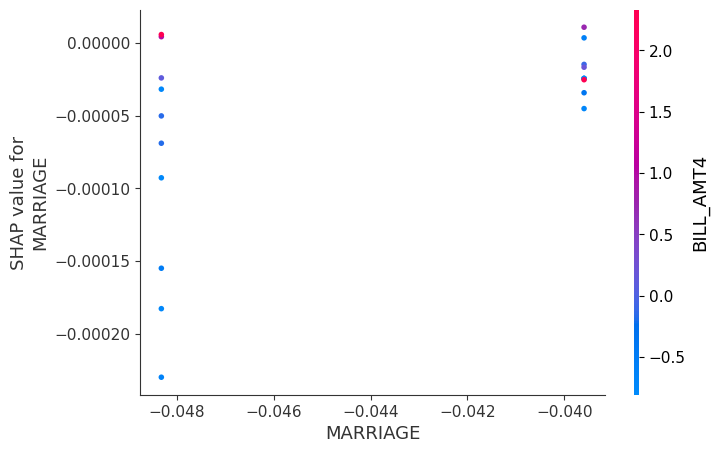

In [18]:
results.xai_shap()


In [19]:
results.measure_inference_time()

16/16 [==============================] - 0s 1ms/step


0.09044289588928223

In [20]:
results.optuna_trials_history()

Cannot plot because optuna study was not given to ModelResults


In [21]:
results.optuna_slice_plot()


Cannot plot because optuna study was not given to ModelResults


In [22]:
results.optuna_hyperparameter_importances()


Cannot plot because optuna study was not given to ModelResults
